In [1]:
# import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
ulam_df = pd.read_csv('./data_collection/ulam.csv', sep=',', index_col=0)
print('ulam_df.shape: {}'.format(ulam_df.shape))

ulam_df.shape: (91, 2)


In [3]:
# check dataframe info
ulam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ulam_titles  91 non-null     object
 1   ingredients  91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [4]:
# check few random sample
ulam_df.sample(30)

,ulam_titles,ingredients
20,Pochero,"['OR\nBEEF', 'OR\nPORK', 'CHICKEN', 'TOMATO', ..."
45,Lugaw,"['RICE', 'CHICKEN', 'FISH SAUCE', 'GINGER', 'G..."
25,Sinigang na hipon,"['SHRIMPS', 'TAMARIND', 'TOMATO', 'ONION', 'WA..."
36,Pancit malabon,"['NOODLES', 'PORK', 'SHRIMPS', 'FISH SAUCE', '..."
4,Tokneneng,"['EGGS', 'ANNATTO POWDER', 'FLOUR', 'SALT', 'B..."
63,Bibingka,"['RICE FLOUR', 'EGGS', 'COCONUT MILK', 'BUTTER..."
57,Tinolang manok,"['CHICKEN', 'PAPAYA', 'TLAOLA SERRANO CHILI PE..."
42,Champorado,"['RICE', 'COCOA BEANS', 'SUGAR', 'CONDENSED MI..."
1,Talunan,"['CHICKEN', 'VINEGAR', 'GINGER', 'GARLIC', 'FI..."
70,Tinola,"['OR\nCHICKEN', 'SEAFOOD', 'FISH SAUCE', 'PAPA..."


In [5]:
# compute basic ulam_titles descriptive stats
ulam_df['ulam_titles'].describe()

count              91
unique             91
top       Pichi-pichi
freq                1
Name: ulam_titles, dtype: object

In [6]:
# remove the "OR\n" to some ingredients and convert the ingredients 
# list to a single string where each ingredient are separated by the symbol '|'
def remove_or_slash_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    ingredients_cleaned = [ingredient.split(r'OR\n')[-1].lower().strip() for ingredient in list(ingredients)]
    return '|'.join(ingredients_cleaned)
ulam_df['ingredients'] = ulam_df['ingredients'].apply(remove_or_slash_n)

In [7]:
# check few random sample
ulam_df.sample(10)

,ulam_titles,ingredients
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot
18,Adobong pusit,squid|vinegar|soy sauce|onion|tomato|garlic|sa...
77,Pancit canton,noodles|pork|beef|seafood|soy sauce|carrot|oni...
29,Espasol,rice flour|coconut|coconut milk
64,Atchara,papaya|carrot|onion|daikon radish|bell pepper|...
16,Brazo de Mercedes,eggs|vanilla|condensed milk|sugar|lime|lemon|c...
76,Halo-Halo,ice cream|leche flan|milk|bananas|durian|mung ...
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...
24,Tortang talong,eggplant|eggs
86,Lumpia,lumpiang shanghai


In [8]:
# compute total ingredients per dish (ulam)
ulam_df['num_ingredients'] = ulam_df['ingredients'].apply(lambda ing: len(ing.split('|')))
ulam_df.sort_values(by='num_ingredients', ascending=False)

,ulam_titles,ingredients,num_ingredients
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,15
85,Kare-kare,pork|oxtail|chicken|goat|peanut butter|peanuts...,14
50,Batchoy,noodles|stock|pork|bone marrow|offal|eggs|chic...,13
56,Pinakbet,pork|shrimp paste|pumpkin|sweet potato|eggplan...,13
17,Giniling,beef|bell pepper|olive oil|garlic|onion|olives...,12
...,...,...,...
12,Banana Cue,bananas|sugar,2
46,Proben,offal|cornstarch,2
5,Bukayo,coconut|sugar,2
24,Tortang talong,eggplant|eggs,2


In [9]:
# check lumpia records
ulam_df[ulam_df.ulam_titles.apply(lambda ulam: 'lumpia' in ulam.lower())]

,ulam_titles,ingredients,num_ingredients
28,Lumpiang Shanghai,pork|beef|carrot|onion|salt|black pepper|sweet...,7
86,Lumpia,lumpiang shanghai,1


In [10]:
# drop Lumpia record (index-86) as its ingredient value is a Lumpia variant
ulam_df.drop([86], axis=0, inplace=True)

Text(0.5, 0, 'num_ingredients')

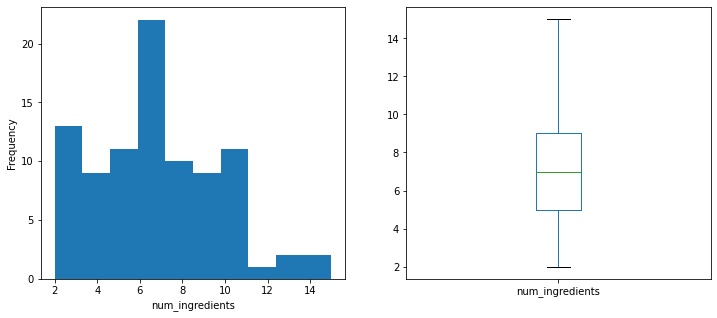

In [11]:
# view distribution of num_ingredients
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ulam_df['num_ingredients'].plot(kind='hist', ax=axes[0])
ulam_df['num_ingredients'].plot(kind='box', ax=axes[1], xlabel='')
axes[0].set_xlabel('num_ingredients')

In [12]:
# compute basic descriptive stats for number of ingredients
ulam_df['num_ingredients'].describe()

count    90.000000
mean      6.811111
std       2.948603
min       2.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      15.000000
Name: num_ingredients, dtype: float64

In [13]:
# represent ingredients data as bag-of-words
from sklearn.feature_extraction.text import CountVectorizer 

cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 130


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'pancit batil patong',
 'pancit bihon',
 'pancit canton',
 'panci

In [14]:
# look for ulam (dish) that has pancit in its ingredients or in its ulam title
def look_for_pancit(ulam):
    return 'pancit' in ulam.ulam_titles.lower() or 'pancit' in ulam.ingredients
mask = ulam_df[['ulam_titles', 'ingredients']].apply(look_for_pancit, axis=1)
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
34,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,7
36,Pancit malabon,noodles|pork|shrimps|fish sauce|cabbage|chicha...,9
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot,6
52,Pancit palabok,noodles|shrimps|fish sauce|eggs|chicharrón|sca...,8
77,Pancit canton,noodles|pork|beef|seafood|soy sauce|carrot|oni...,9
90,Pancit,pancit canton|pancit bihon|pancit palabok|panc...,8


In [15]:
# drop Pancit record as its ingredients are Pancit variants
ulam_df.drop([90], inplace=True)

In [16]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 122


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled

In [17]:
# look for ulam titles that has 'tapa (philippines)' as one of its ingredients
mask = ulam_df['ingredients'].apply(lambda ings: 'tapa (philippines)' in ings.split('|'))
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
49,Tapsilog,tapa (philippines)|eggs|rice|garlic,4
78,Silog,rice|eggs|garlic|tapa (philippines)|hot dog|to...,9


In [18]:
# drop Tapsilog record, leaving Silog as the general dish/ulam with silog related ingredients 
ulam_df.drop([49], inplace=True)

In [19]:
# look for ulam (dish) that has 'leche flan' in its ingredients or in its ulam title
def look_for_leche_flan(ulam):
    return 'leche flan' in ulam.ulam_titles.lower() or 'leche flan' in ulam.ingredients
mask = ulam_df[['ulam_titles', 'ingredients']].apply(look_for_leche_flan, axis=1)
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
76,Halo-Halo,ice cream|leche flan|milk|bananas|durian|mung ...,10
80,Leche Flan,eggs|milk|condensed milk|sugar|vanilla,5


In [20]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 122


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled

In [21]:
bow = cv.transform(ulam_df['ingredients'])
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names(), index=ulam_df['ulam_titles'])
bow_df.head()

,annatto powder,baking powder,banana ketchup,bananas,bangus,bay leaf,beef,bell pepper,bitter melon,black pepper,...,tocino,tofu,tomato,tomato sauce,tuna,vanilla,vinegar,water spinach,white wine vinegar,yam
ulam_titles,,,,,,,,,,,,,,,,,,,,,
Adobong manok,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Talunan,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Kilawin,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Filipino Spaghetti,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tokneneng,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
ingredients_total = bow_df.sum().sort_values(ascending=False) 
ingredients_total[(ingredients_total > 2) & (ingredients_total <= 30)]

pork                           30
onion                          30
sugar                          27
black pepper                   22
eggs                           18
chicken                        18
beef                           17
ginger                         15
fish sauce                     14
soy sauce                      14
carrot                         13
vinegar                        13
coconut milk                   10
rice flour                      9
coconut                         9
tomato                          9
peppercorns                     8
potatoes                        8
tlaola serrano chili pepper     8
bell pepper                     8
eggplant                        7
condensed milk                  7
offal                           7
noodles                         7
cabbage                         7
green beans                     6
bay leaf                        6
vanilla                         6
tomato sauce                    5
hot peppers   

In [23]:
common_meat_ingredients = {
    'pork', 'chicken', 'beef', 'offal', 'goat', 'oxtail', 'squid', 'shrimps', 'seafood'}

def check_meat_ingredient_count(ingredients):
    meat_intersection = common_meat_ingredients.intersection(set(ingredients.split('|')))
    return len(meat_intersection) > 1

mask = ulam_df['ingredients'].apply(check_meat_ingredient_count)
ulam_with_meat_variants = ulam_df[mask]
ulam_with_meat_variants

,ulam_titles,ingredients,num_ingredients
2,Kilawin,pork|seafood|vinegar|citrus fruit|onion|ginger...,11
7,Lauya,chicken|pork|beef|cabbage|carrot|potatoes|garl...,11
8,Pinikpikan,chicken|pork|cabbage|green beans|salt,5
14,Binagoongan,pork|chicken|beef|shrimp paste,4
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,15
28,Lumpiang Shanghai,pork|beef|carrot|onion|salt|black pepper|sweet...,7
34,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,7
36,Pancit malabon,noodles|pork|shrimps|fish sauce|cabbage|chicha...,9
39,Morcon,pork|beef|sausage|carrot|pickled cucumbers|eggs,6
41,Bola-bola,beef|pork|onion|eggs|soy sauce|garlic|black pe...,10


In [24]:
def get_ulam_variants(ulam):
    
    ulam_ingredients_set = set(ulam.ingredients.split('|'))
    meat_variants = common_meat_ingredients.intersection(ulam_ingredients_set)
    
    ulam_titles = []
    ulam_ingredients = []
    num_ingredients = []
    for variant in meat_variants:
        ulam_title = f'{variant.lower()} {ulam.ulam_titles.lower()}'
        ingredients = list(meat_variants.symmetric_difference(ulam_ingredients_set))
        ingredients.insert(0, variant)
        ulam_titles.append(ulam_title)
        ulam_ingredients.append('|'.join(ingredients))
        num_ingredients.append(len(ingredients))
    
        
    return pd.DataFrame({'ulam_titles': ulam_titles, 
                         'ingredients': ulam_ingredients, 
                         'num_ingredients': num_ingredients})

In [25]:
for i in range(ulam_with_meat_variants.shape[0]):
    idx = int(ulam_with_meat_variants.iloc[i].name)
    ulam = ulam_with_meat_variants.iloc[i]
    ulam_variants_df = get_ulam_variants(ulam)
    ulam_df.drop(idx, inplace=True)
    ulam_df = pd.concat([ulam_df, ulam_variants_df])
ulam_df.reset_index(drop=True, inplace=True)

In [26]:
ulam_df.ulam_titles.sort_values().values

array(['Adobong manok', 'Adobong pusit', 'Afritada', 'Arroz caldo',
       'Atchara', 'Banana Cue', 'Bibingka', 'Bicol Express', 'Bilo-bilo',
       'Bistek Tagalog', 'Bopis', 'Brazo de Mercedes', 'Bukayo',
       'Buko Pie', 'Bulalô', 'Butsi', 'Cascaron', 'Champorado',
       'Crispy Pata', 'Daing na bangus', 'Dinuguan', 'Espasol',
       'Filipino Spaghetti', 'Giniling', 'Gulaman', 'Halo-Halo',
       'Inasal na manok', 'Inihaw na liempo', 'Kalamay', 'Kinilaw',
       'Kutsinta', 'Kwek kwek', 'Latik', 'Leche Flan', 'Lechon',
       'Lechon kawali', 'Lugaw', 'Maja blanca', 'Maruya', 'Nilagang baka',
       'Paksiw', 'Palitaw', 'Pancit palabok', 'Papaitan', 'Pares',
       'Pichi-pichi', 'Pinakbet', 'Pinangat', 'Proben', 'Puto',
       'Sans rival', 'Sapin-sapin', 'Silog', 'Sinigang na baboy',
       'Sinigang na hipon', 'Taho', 'Talunan', 'Tapa (Philippines)',
       'Tinolang manok', 'Tocino', 'Tokneneng', 'Torta', 'Tortang talong',
       'Turon', 'Ube halaya', 'Utan', 'beef binagoo

In [27]:
def similar_to(ulam):
    return ulam_df.ulam_titles.apply(lambda title: ulam.lower() in title.lower())

# check records similar to adobo
ulam_df[similar_to('adobo')]

,ulam_titles,ingredients,num_ingredients
0,Adobong manok,chicken|onion|garlic|soy sauce|white wine vine...,9
14,Adobong pusit,squid|vinegar|soy sauce|onion|tomato|garlic|sa...,9
113,pork adobo,pork|salt|bay leaf|garlic|soy sauce|black pepp...,9
114,squid adobo,squid|salt|bay leaf|garlic|soy sauce|black pep...,9
115,chicken adobo,chicken|salt|bay leaf|garlic|soy sauce|black p...,9


In [28]:
# remove adobo duplicates
ulam_df.drop([0, 14], inplace=True)

In [29]:
ulam_df.ulam_titles.sort_values().values

array(['Afritada', 'Arroz caldo', 'Atchara', 'Banana Cue', 'Bibingka',
       'Bicol Express', 'Bilo-bilo', 'Bistek Tagalog', 'Bopis',
       'Brazo de Mercedes', 'Bukayo', 'Buko Pie', 'Bulalô', 'Butsi',
       'Cascaron', 'Champorado', 'Crispy Pata', 'Daing na bangus',
       'Dinuguan', 'Espasol', 'Filipino Spaghetti', 'Giniling', 'Gulaman',
       'Halo-Halo', 'Inasal na manok', 'Inihaw na liempo', 'Kalamay',
       'Kinilaw', 'Kutsinta', 'Kwek kwek', 'Latik', 'Leche Flan',
       'Lechon', 'Lechon kawali', 'Lugaw', 'Maja blanca', 'Maruya',
       'Nilagang baka', 'Paksiw', 'Palitaw', 'Pancit palabok', 'Papaitan',
       'Pares', 'Pichi-pichi', 'Pinakbet', 'Pinangat', 'Proben', 'Puto',
       'Sans rival', 'Sapin-sapin', 'Silog', 'Sinigang na baboy',
       'Sinigang na hipon', 'Taho', 'Talunan', 'Tapa (Philippines)',
       'Tinolang manok', 'Tocino', 'Tokneneng', 'Torta', 'Tortang talong',
       'Turon', 'Ube halaya', 'Utan', 'beef binagoongan',
       'beef bola-bola', 'beef kal

In [30]:
# check records similar to sinigang
ulam_df[similar_to('sinigang')]

,ulam_titles,ingredients,num_ingredients
20,Sinigang na hipon,shrimps|tamarind|tomato|onion|water spinach|ok...,10
30,Sinigang na baboy,pork|tamarind|tomato|onion|garlic|okra|radish|...,9
105,seafood sinigang,seafood|salt|long beans|tamarind|eggplant|wate...,10
106,pork sinigang,pork|salt|long beans|tamarind|eggplant|water s...,10


In [31]:
ulam_df.drop([105, 106], inplace=True)

In [41]:
ulam_df.ulam_titles = ulam_df.ulam_titles.apply(lambda title: title.lower())
ulam_df.ulam_titles.sort_values().shape

(114,)

In [38]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 119


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled cucumbers',
 'pineapple j

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

bow = cv.transform(ulam_df['ingredients'])
tfidf = TfidfTransformer().fit(bow)
tfidf_matrix = tfidf.transform(bow)
print('tfidf_matrix.shape: {}'.format(tfidf_matrix.shape))

tfidf_matrix.shape: (114, 119)


In [42]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('cosine_sim.shape: {}'.format(cosine_sim.shape))

cosine_sim.shape: (114, 114)


In [43]:
# Build a 1-dimensional array with ulam titles
titles = ulam_df['ulam_titles']
indices = pd.Series(ulam_df.index, index=ulam_df['ulam_titles'])

In [81]:
def get_ulam_recommendations(ingredients):
    ingredients_bow = cv.transform([ingredients])
    ingredients_tfidf = tfidf.transform(ingredients_bow)
    cosine_sim_ingredients = cosine_similarity(tfidf_matrix, ingredients_tfidf)
    sim_scores = list(enumerate(cosine_sim_ingredients[:]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=False)
    sim_scores = sim_scores[:10]
    ulam_indices = [i[0] for i in sim_scores]
    return titles.iloc[ulam_indices], ulam_df['ingredients'].iloc[ulam_indices]

In [82]:
my_available_ingredients = 'pork|salt|bay leaf|garlic|soy sauce|black pepper|vinegar'
get_ulam_recommendations(my_available_ingredients)

(2     filipino spaghetti
 4                 bukayo
 9             banana cue
 10           maja blanca
 11               kalamay
 12     brazo de mercedes
 15            ube halaya
 16                 latik
 19        tortang talong
 21              kutsinta
 Name: ulam_titles, dtype: object,
 2             noodles|beef|hot dog|banana ketchup|sugar
 4                                         coconut|sugar
 9                                         bananas|sugar
 10            coconut milk|cornstarch|corn|cheese|latik
 11                        coconut milk|rice flour|sugar
 12    eggs|vanilla|condensed milk|sugar|lime|lemon|c...
 15    yam|milk|coconut milk|condensed milk|sugar|van...
 16                     coconut milk|coconut cream|sugar
 19                                        eggplant|eggs
 21            rice flour|sugar|lye water|annatto powder
 Name: ingredients, dtype: object)

In [79]:
ulam_df[ulam_df.ulam_titles == 'pork adobo'].values

array([['pork adobo',
        'pork|salt|bay leaf|garlic|soy sauce|black pepper|sugar|vinegar|oil',
        9]], dtype=object)